# Homework 3

## Pair Programming Group Number: 16
## Members of Team: Michel Gonzalez

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
url = 'https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/'

df = pd.read_csv(url)

df.head()

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan


## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
# data cleaning by droping all rows with Nan values, all duplicates, 
# and resets the index to start from 0 to length - 1

df1 = df.dropna().drop_duplicates().reset_index().drop(columns = ['index'])

df1.head()

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula

# radius of earth (km)
r = 6371.0088

# hav(x) = sin^2(x/2)

def haversine_distance(pt1,pt2):

  pt1_rad = []

  pt2_rad = []

  for i in range (0, 2):
    
    pt1_rad.append(pt1[i] * (np.pi / 180))
    
    pt2_rad.append(pt2[i] * (np.pi / 180))

  h = float(((np.sin((pt2_rad[0] - pt1_rad[0])/2) ** 2) + np.cos(pt1_rad[0]) * 
       np.cos(pt2_rad[0]) *(np.sin((pt2_rad[1] - pt1_rad[1])/2) ** 2)))
  
  d = float(2 * r * np.arcsin(np.sqrt(h)))

  return d
    #code here, make sure pt1 and pt2 are passed in as degrees (lat,long) and convert to radians before calculation

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244772513569124

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`

# creates a data frame with just the lattitude and longtitude  data of the cleaned set

lat_long = df1[['Lattitude', 'Longtitude']]

# generates an array of the length of the lattitude and longtitude data

distance_data = np.array([pd.NaT for i in range (0, len(lat_long))])

# Gets the distance between toorak and the lattitude and longtitude

for i in range(0, len(lat_long)):

  distance_data[i] = haversine_distance(toorak_pt, [lat_long['Lattitude'][i], lat_long['Longtitude'][i]])

# creates a new dataframe with a new column displaying the distance in km between koorak and the location

df2 = df1.assign(distance_to_toorak = distance_data)

df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
type_repl = pd.get_dummies(df2['Type'], prefix = 'Type')

type_repl

columns_list = df2.columns

columns_list

df3 = df2.join(type_repl)


df3 = df3.reindex(columns = ['Suburb', 'Address', 'Rooms', 'Type', 'Type_h', 'Type_t', 'Type_u', 
                             'Price', 'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                             'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 
                             'Regionname', 'distance_to_toorak'])

df3 = df3.drop(columns = ['Type'])

df3


,Suburb,Address,Rooms,Type_h,Type_t,Type_u,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,1,0,0,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,1,0,0,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,1,0,0,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,1,0,0,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,0,0,1,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,1,0,0,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,1,0,0,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,0,1,0,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,0,1,0,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method='pearson')

,Rooms,Type_h,Type_t,Type_u,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
Rooms,1.000000,0.501128,-0.040762,-0.535102,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846
Type_h,0.501128,1.000000,-0.484749,-0.778062,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387
Type_t,-0.040762,-0.484749,1.000000,-0.172282,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603
Type_u,-0.535102,-0.778062,-0.172282,1.000000,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533
Price,0.502814,0.391761,-0.095295,-0.372766,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597
Postcode,0.054676,-0.040504,-0.008546,0.051754,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934
Bedroom2,0.941684,0.484612,-0.037366,-0.518941,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236
Bathroom,0.593847,0.181773,0.108148,-0.282390,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313
Car,0.401716,0.214175,-0.006836,-0.236298,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915
Landsize,0.085676,0.047422,-0.067257,-0.005103,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [8]:
# Step one, build the matrix X

# gets only the numeric values from the data

df3_numeric = df3.select_dtypes(np.number)

# concatinates the intercept coloumn 

df3_numeric = pd.concat([pd.DataFrame({'Intercept' : np.ones(len(df3))}), df3_numeric], axis = 1)

# Drops all non discrete numerical variables

df3_numeric_cat = df3_numeric.drop(columns = ['BuildingArea'])

# 

df3_numeric_dis = pd.concat([df3_numeric_cat, df3[['distance_to_toorak']]], axis = 1)

# all numerics
# ['Intercept', 'Rooms','Type_h', 'Type_t', 'Type_u', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude', 'distance_to_toorak']

X = df3_numeric_dis[['Intercept', 'Rooms','Type_h', 'Type_t', 'Type_u', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude', 'distance_to_toorak']]

X

,Intercept,Rooms,Type_h,Type_t,Type_u,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,1.0,2,1,0,0,3067.0,2.0,1.0,0.0,1900.0,-37.80790,144.99340,4.261612
1,1.0,3,1,0,0,3067.0,4.0,2.0,0.0,1910.0,-37.80240,144.99930,4.621843
2,1.0,2,1,0,0,3067.0,2.0,1.0,2.0,1890.0,-37.80600,144.99540,4.374206
3,1.0,2,1,0,0,3067.0,3.0,1.0,2.0,1900.0,-37.80100,144.99890,4.780655
4,1.0,2,0,0,1,3067.0,2.0,2.0,1.0,2009.0,-37.80780,144.99650,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,3,1,0,0,3046.0,3.0,1.0,1.0,1960.0,-37.70425,144.93164,16.998846
3906,1.0,4,1,0,0,3088.0,4.0,3.0,1.0,1975.0,-37.70077,145.12743,18.491623
3907,1.0,3,0,1,0,3190.0,3.0,1.0,2.0,2000.0,-37.94775,145.02379,11.798784
3908,1.0,4,0,1,0,3190.0,4.0,2.0,2.0,2007.0,-37.94633,145.04947,11.986684


In [9]:
# Step two, build the column vector y

y = np.array(df3_numeric_cat[['Price']])

In [10]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
# beta_hat = (XT * X)^-1 * XT * y

X_sq = np.array(np.matmul(X.T, X), dtype = 'float')

X_inv = np.linalg.inv(X_sq)

X_T = np.matmul(X_inv, X.T)

beta_hat = np.matmul(X_T, y)

beta_hat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  after removing the cwd from sys.path.


,0
0,858413852.817987
1,-585233.434828
2,-844763152.220203
3,-843535893.298249
4,-844444083.639606
5,692.789792
6,33731.636537
7,236979.677216
8,64825.593699
9,-2929.613073


In [11]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(X.iloc[23],beta_hat) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  


0    798888.323852
dtype: object

In [12]:
# This is the actual price at this point
y[23]

array([805000.])

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [13]:
from numpy.core.numeric import NaN
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
url_2 = 'https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv'

df_sold = pd.read_csv(url_2)

df_sold = df_sold.fillna(method='bfill')

df_sold = df_sold.fillna(method='ffill')

df_sold.head()






,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,222.0,1980.0,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,129.0,1980.0,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan


In [14]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame


# Inserts the distance array into the data

# creates a data frame with just the lattitude and longtitude

lat_long_sold = df_sold[['Lattitude', 'Longtitude']]

# generates an array of the length of the lattitude and longtitude data

distance_data = np.array([pd.NaT for i in range (0, len(lat_long_sold))])

# Gets the distance between toorak and the lattitude and longtitude

for i in range(0, len(lat_long_sold)):

  distance_data[i] = haversine_distance(toorak_pt, [lat_long_sold['Lattitude'][i], lat_long_sold['Longtitude'][i]])

# creates a new dataframe with a new column displaying the distance in km between koorak and the location

df_sold = df_sold.assign(distance_to_toorak = distance_data)

# Insert and replaces the type catagorical variable with the one-hot encoding

type_repl_sold = pd.get_dummies(df_sold['Type'], prefix = 'Type')

type_repl_sold

columns_list = df_sold.columns

columns_list

df_sold_numeric= df_sold.join(type_repl)


df_sold_numeric = df_sold_numeric.reindex(columns = ['Suburb', 'Address', 'Rooms', 'Type', 'Type_h', 'Type_t', 'Type_u', 
                                                     'Price', 'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
                                                     'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 
                                                     'Regionname', 'distance_to_toorak'])

df_sold_numeric = df_sold_numeric.drop(columns = ['Type'])

df_sold_numeric



,Suburb,Address,Rooms,Type_h,Type_t,Type_u,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Jacana,29 Fox Ct,3,1,0,0,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,222.0,1980.0,Hume,-37.68907,144.91459,Northern Metropolitan,19.181567
1,Keilor Park,45 Collinson St,3,1,0,0,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263068
2,Kensington,42 Gower St,3,1,0,0,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,129.0,1980.0,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.29681
3,Kew,6/385 Barkers Rd,3,1,0,0,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.16825
4,Kew,11 Raheen Dr,4,0,0,1,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,0,1,0,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,Whittlesea,-37.86887,145.22116,Eastern Metropolitan,18.262739
1017,Werribee,5 Nuragi Ct,4,1,0,0,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,Whittlesea,-37.89327,144.64789,Western Metropolitan,32.814349
1018,Westmeadows,9 Black St,3,1,0,0,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,172.0,1981.0,Whittlesea,-37.67917,144.89390,Northern Metropolitan,21.030518
1019,Wheelers Hill,12 Strada Cr,4,1,0,0,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,172.0,1981.0,Whittlesea,-37.90562,145.16761,South-Eastern Metropolitan,15.081333


In [15]:
# Step two, build the attribute matrix Xdot 

df_sold_numeric_only = df_sold_numeric.select_dtypes(np.number)

# concatinates the intercept coloumn 

df_sold_numeric_only = pd.concat([pd.DataFrame({'Intercept' : np.ones(len(df_sold_numeric_only))}), df_sold_numeric_only], axis = 1)

# Drops all non discrete numerical variables

df_sold_numeric_clean = df_sold_numeric_only.drop(columns = ['Landsize', 'BuildingArea'])

# 

df_sold_numeric_clean = pd.concat([df_sold_numeric_clean, df_sold_numeric[['distance_to_toorak']]], axis = 1)

# all numerics
# ['Intercept', 'Rooms','Type_h', 'Type_t', 'Type_u', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude', 'distance_to_toorak']

Xdot = df_sold_numeric_clean[['Intercept', 'Rooms','Type_h', 'Type_t', 'Type_u', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude', 'distance_to_toorak']]

Xdot

,Intercept,Rooms,Type_h,Type_t,Type_u,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,1.0,3,1,0,0,3047.0,3.0,1.0,4.0,1980.0,-37.68907,144.91459,19.181567
1,1.0,3,1,0,0,3042.0,3.0,2.0,2.0,1980.0,-37.72224,144.85739,19.263068
2,1.0,3,1,0,0,3031.0,3.0,1.0,0.0,1980.0,-37.79560,144.92779,9.29681
3,1.0,3,1,0,0,3101.0,3.0,2.0,2.0,1980.0,-37.81614,145.05056,4.16825
4,1.0,4,0,0,1,3101.0,4.0,2.0,2.0,1970.0,-37.80437,145.01725,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1.0,4,0,1,0,3152.0,4.0,2.0,2.0,1980.0,-37.86887,145.22116,18.262739
1017,1.0,4,1,0,0,3030.0,4.0,2.0,1.0,1980.0,-37.89327,144.64789,32.814349
1018,1.0,3,1,0,0,3049.0,3.0,2.0,2.0,1981.0,-37.67917,144.89390,21.030518
1019,1.0,4,1,0,0,3150.0,4.0,2.0,2.0,1981.0,-37.90562,145.16761,15.081333


In [16]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes

y_hat = abs(np.matmul(Xdot, beta_hat))

y_hat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  after removing the cwd from sys.path.


,0
0,828258.433184
1,962080.693591
2,1066288.453249
3,1697914.354748
4,1494533.685631
...,...
1016,1774362.965184
1017,114981.449647
1018,849303.519033
1019,720476.461418


In [17]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"

actual = df_sold_numeric['Price']

expected = y_hat[0]

abs_error = abs(actual - expected)

abs_error



0        207758.433184
1        212080.693591
2          6288.453249
3        292914.354748
4       1520466.314369
             ...      
1016     444362.965184
1017     520018.550353
1018     267303.519033
1019     524523.538582
1020     285387.848703
Length: 1021, dtype: object

(0.0, 3000000.0)

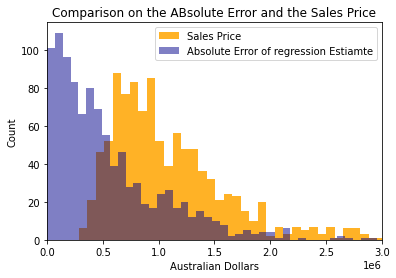

In [18]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 

plt.hist(actual, bins = 80, color = 'orange', alpha = 0.85, label = 'Sales Price')

plt.hist(abs_error, bins = 80, color = 'darkblue', alpha = 0.5, label = 'Absolute Error of regression Estiamte')

plt.title('Comparison on the ABsolute Error and the Sales Price')

plt.xlabel('Australian Dollars')

plt.ylabel('Count')

plt.legend()

plt.xlim(0, 3e6)

